In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [84]:
#To view all columns
pd.set_option("display.max_columns", None)

Exploratory Data Analysis

In [86]:
#Importing Data
df=pd.read_excel("Downloads/Telco_customer_churn.xlsx/Telco_customer_churn.xlsx")
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

We need to convert all variables to numeric and scale them for clustering, after dropping useless columns.

In [89]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


In [90]:
#Dropping Useless Columns
df1 = df.drop(['CustomerID', 'Count','Country', 'Lat Long', 'Contract', 'Churn Label', 'State'], axis=1)
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,90005,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [91]:
df1['City'].value_counts()

City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64

In [92]:
#Mapping Yes and No as 1 and 0
dict1={"No":0, "Yes":1}
cat_cols = ['Senior Citizen', 'Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup',
    'Device Protection',	'Tech Support',	'Streaming TV',	'Streaming Movies',	'Paperless Billing']
df1[cat_cols]=df1[cat_cols].replace(dict1)
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,90005,34.059281,-118.307420,Female,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,1,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,1,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,1,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [93]:
#Checking if all the columns have changed to int datatype
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   object 
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   object 
 13  Online Backup      7043 non-null   object 
 14  Device Protection  7043 non-null   object 
 15  Tech Support       7043 non-null   object 
 16  Streaming TV       7043 

We can see that a few columns have not changed, we will check what string values are remaining in the column and change them to numeric as well

In [95]:
df1['Multiple Lines'].value_counts()

Multiple Lines
0                   3390
1                   2971
No phone service     682
Name: count, dtype: int64

In [96]:
df1['Online Security'].value_counts()

Online Security
0                      3498
1                      2019
No internet service    1526
Name: count, dtype: int64

In [97]:
df1['Online Backup'].value_counts()

Online Backup
0                      3088
1                      2429
No internet service    1526
Name: count, dtype: int64

In [98]:
df1['Device Protection'].value_counts()

Device Protection
0                      3095
1                      2422
No internet service    1526
Name: count, dtype: int64

In [99]:
df1['Tech Support'].value_counts()

Tech Support
0                      3473
1                      2044
No internet service    1526
Name: count, dtype: int64

In [100]:
df1['Streaming TV'].value_counts()

Streaming TV
0                      2810
1                      2707
No internet service    1526
Name: count, dtype: int64

In [101]:
df1['Streaming Movies'].value_counts()

Streaming Movies
0                      2785
1                      2732
No internet service    1526
Name: count, dtype: int64

In [102]:
dict2={'No internet service':2}
df1[cat_cols]=df1[cat_cols].replace(dict2)
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason
0,Los Angeles,90003,33.964131,-118.272783,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1,86,3239,Competitor made better offer
1,Los Angeles,90005,34.059281,-118.307420,Female,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,67,2701,Moved
2,Los Angeles,90006,34.048013,-118.293953,Female,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,1,Electronic check,99.65,820.5,1,86,5372,Moved
3,Los Angeles,90010,34.062125,-118.315709,Female,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,1,Electronic check,104.80,3046.05,1,84,5003,Moved
4,Los Angeles,90015,34.039224,-118.266293,Male,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,1,Bank transfer (automatic),103.70,5036.3,1,89,5340,Competitor had better devices


In [103]:
dict3={'No phone service':2}
df1[cat_cols]=df1[cat_cols].replace(dict3)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   object 
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

In [104]:
#Encoding Gender column
dict4 = {'Male':1, 'Female':0}
df1['Gender']=df['Gender'].replace(dict4)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

We can see that Total Charges is an object. This is due to blank strings, we will impute the value for the blank strings with Tenure Months* Monthly Charges

In [106]:
#Finding total Blank strings
(df1['Total Charges']==' ').sum()

11

In [107]:
# Ensuring column is treated as string
df1['Total Charges'] = df1['Total Charges'].astype(str)

# Finding rows where Total Charges is blank or just spaces
mask_blank = df1['Total Charges'].str.strip() == ''


In [108]:
# Converting Total Charges to numeric, first only for non-blank values
df1.loc[~mask_blank, 'Total Charges'] = df1.loc[~mask_blank, 'Total Charges'].astype(float)

# Imputing blank values
df1.loc[mask_blank, 'Total Charges'] = (
    df1.loc[mask_blank, 'Tenure Months'].astype(float) * 
    df1.loc[mask_blank, 'Monthly Charges'].astype(float)
)

In [109]:
#Converting entire Column into float
df1['Total Charges'] = df1['Total Charges'].astype(float)

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   object 
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   object 
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

In [111]:
#Dropping as there are too many missing Values
df1=df1.drop(['Churn Reason'], axis=1)
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,Los Angeles,90003,33.964131,-118.272783,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,1,Mailed check,53.85,108.15,1,86,3239
1,Los Angeles,90005,34.059281,-118.307420,0,0,0,1,2,1,0,Fiber optic,0,0,0,0,0,0,1,Electronic check,70.70,151.65,1,67,2701
2,Los Angeles,90006,34.048013,-118.293953,0,0,0,1,8,1,1,Fiber optic,0,0,1,0,1,1,1,Electronic check,99.65,820.50,1,86,5372
3,Los Angeles,90010,34.062125,-118.315709,0,0,1,1,28,1,1,Fiber optic,0,0,1,1,1,1,1,Electronic check,104.80,3046.05,1,84,5003
4,Los Angeles,90015,34.039224,-118.266293,1,0,0,1,49,1,1,Fiber optic,0,1,1,0,1,1,1,Bank transfer (automatic),103.70,5036.30,1,89,5340


Encoding and Scaling for Clustering

In [113]:
#Using Label Encoding for the remaining columns
cat_cols2 = ['City', 'Internet Service', 'Payment Method']
le=LabelEncoder()
for col in cat_cols2:
    df1[col]=le.fit_transform(df1[col])
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
0,562,90003,33.964131,-118.272783,1,0,0,0,2,1,0,0,1,1,0,0,0,0,1,3,53.85,108.15,1,86,3239
1,562,90005,34.059281,-118.307420,0,0,0,1,2,1,0,1,0,0,0,0,0,0,1,2,70.70,151.65,1,67,2701
2,562,90006,34.048013,-118.293953,0,0,0,1,8,1,1,1,0,0,1,0,1,1,1,2,99.65,820.50,1,86,5372
3,562,90010,34.062125,-118.315709,0,0,1,1,28,1,1,1,0,0,1,1,1,1,1,2,104.80,3046.05,1,84,5003
4,562,90015,34.039224,-118.266293,1,0,0,1,49,1,1,1,0,1,1,0,1,1,1,0,103.70,5036.30,1,89,5340


In [114]:
#Checking if all variables are numeric to proceed with scaling
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int32  
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int32  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

We will first make a copy of the original Dataframe and use Kmeans on that and then append the cluster number to the Original Unscaled data.

In [116]:
df2 = df1.copy()

In [117]:
df2=df2.drop(['Churn Value', 'Churn Score'], axis=1	)

In [118]:
#Scaling the data for Clustering
SS=StandardScaler()
for col in df2.columns:
    df2[col] = SS.fit_transform(df2[[col]])
df2.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV
0,-0.100688,-1.886175,-0.944111,0.707268,0.990532,-0.439916,-0.966622,-0.548093,-1.236724,0.327438,-0.938280,-1.183234,0.351386,0.284912,-0.998016,-0.909172,-1.071457,-1.078210,0.829798,1.334863,-0.362660,-0.958066,-0.981675
1,-0.100688,-1.885103,-0.905362,0.691215,-1.009559,-0.439916,-0.966622,1.824507,-1.236724,0.327438,-0.938280,0.172250,-0.903589,-0.999747,-0.998016,-0.909172,-1.071457,-1.078210,0.829798,0.398558,0.197365,-0.938874,-1.436462
2,-0.100688,-1.884567,-0.909951,0.697457,-1.009559,-0.439916,-0.966622,1.824507,-0.992402,0.327438,0.586128,0.172250,-0.903589,-0.999747,0.286059,-0.909172,0.238887,0.234693,0.829798,0.398558,1.159546,-0.643789,0.821409
3,-0.100688,-1.882423,-0.904204,0.687374,-1.009559,-0.439916,1.034530,1.824507,-0.177995,0.327438,0.586128,0.172250,-0.903589,-0.999747,0.286059,0.347362,0.238887,0.234693,0.829798,0.398558,1.330711,0.338085,0.509483
4,-0.100688,-1.879743,-0.913530,0.710276,0.990532,-0.439916,-0.966622,1.824507,0.677133,0.327438,0.586128,0.172250,-0.903589,0.284912,0.286059,-0.909172,0.238887,0.234693,0.829798,-1.474052,1.294151,1.216150,0.794358


KMeans Clustering

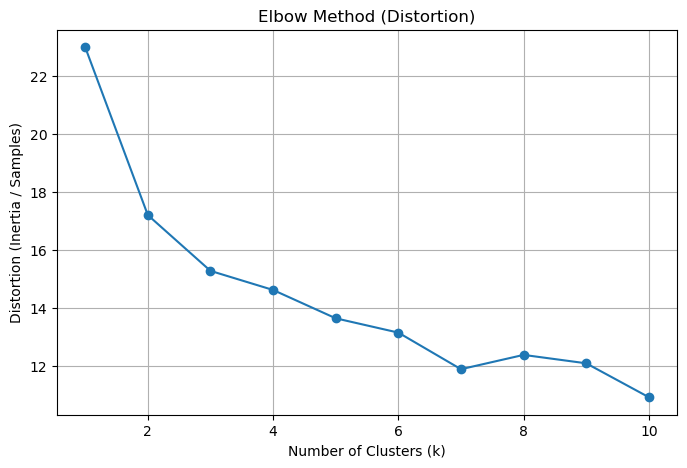

In [120]:
from sklearn.cluster import KMeans
#Elbow Method using Distortion
distortions = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    distortion = kmeans.inertia_ / df2.shape[0]
    distortions.append(distortion)

# Plotting distortion vs k
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method (Distortion)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion (Inertia / Samples)')
plt.grid(True)
plt.show()

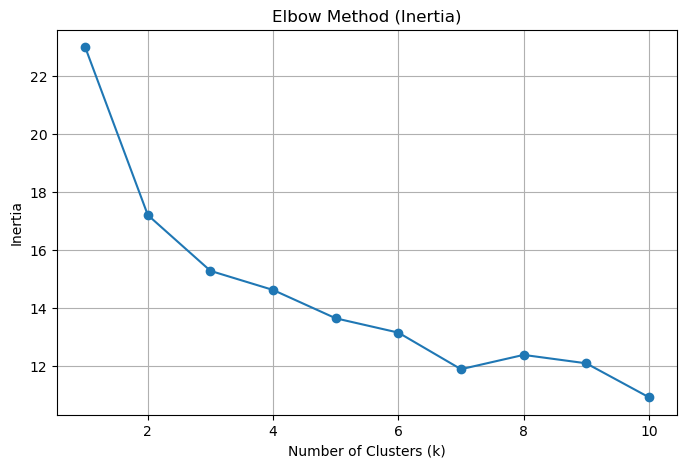

In [121]:
#Elbow Method using Inertia
Inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2)
    Inertias = kmeans.inertia_
    Inertia.append(Inertias)

# Plotting Inertia vs k
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [189]:
#Using the best K value for Kmeans based on The elbow method
km = KMeans(n_clusters=7, random_state=42)
km.fit(df2)
cluster_labels = km.labels_
df1['Cluster']=cluster_labels
df1.head()

,City,Zip Code,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Cluster
0,562,90003,33.964131,-118.272783,1,0,0,0,2,1,0,0,1,1,0,0,0,0,1,3,53.85,108.15,1,86,3239,4
1,562,90005,34.059281,-118.307420,0,0,0,1,2,1,0,1,0,0,0,0,0,0,1,2,70.70,151.65,1,67,2701,4
2,562,90006,34.048013,-118.293953,0,0,0,1,8,1,1,1,0,0,1,0,1,1,1,2,99.65,820.50,1,86,5372,4
3,562,90010,34.062125,-118.315709,0,0,1,1,28,1,1,1,0,0,1,1,1,1,1,2,104.80,3046.05,1,84,5003,4
4,562,90015,34.039224,-118.266293,1,0,0,1,49,1,1,1,0,1,1,0,1,1,1,0,103.70,5036.30,1,89,5340,3


In [191]:
df1['Cluster'].value_counts()

Cluster
3    1475
4    1345
2    1255
0     790
1     760
5     736
6     682
Name: count, dtype: int64

In [193]:
#Creating Dictionary of Clustered Dataframes
cluster_dfs = {}

for cluster_num in range(7):
    cluster_dfs[cluster_num] = df1[df1['Cluster'] == cluster_num].copy()


In [195]:
#Creating a variable for each Cluster
cl1=cluster_dfs[0]
cl2=cluster_dfs[1]
cl3=cluster_dfs[2]
cl4=cluster_dfs[3]
cl5=cluster_dfs[4]
cl6=cluster_dfs[5]
cl7=cluster_dfs[6]

Classification: Building Logistic Regression, Naive_bayes, Random Forest, XGBoost and MLP models to predict Churn Value

In [197]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

#List of Datframes to loop through
clusters = [cl1, cl2, cl3, cl4, cl5, cl6, cl7]

#Models
lr_models = {}
nb_models = {}
rf_models = {}
xgb_models = {}
mlp_models = {}
results = {}

# Looping through each cluster
for i, df in enumerate(clusters, start=1):
    print(f"\nTraining on Cluster {i}")
    
    # Separating features and target variables
    X = df.drop(['Churn Value', 'Churn Score','Cluster'], axis=1)
    y = df['Churn Value']
    
    # Splitting the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic Regression Model
    lr = LogisticRegression(random_state=42)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
    lr_models[i] = lr

    # Naive Bayes Model
    nb = GaussianNB()
    nb.fit(X_train, y_train)
    y_pred_nb = nb.predict(X_test)
    accuracy_nb = metrics.accuracy_score(y_test, y_pred_nb)
    nb_models[i] = nb
    
    # Random Forest Model
    rf = RandomForestClassifier(random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = metrics.accuracy_score(y_test, y_pred_rf)
    rf_models[i] = rf
    
    # XGBoost Model
    xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
    xgb.fit(X_train, y_train)
    y_pred_xgb = xgb.predict(X_test)
    accuracy_xgb = metrics.accuracy_score(y_test, y_pred_xgb)
    xgb_models[i] = xgb
    
    # MLP Model
    mlp = MLPClassifier(hidden_layer_sizes=(100,50,10), random_state=100)
    mlp.fit(X_train, y_train)
    y_pred_mlp = mlp.predict(X_test)
    accuracy_mlp = metrics.accuracy_score(y_test, y_pred_mlp)
    mlp_models[i] = mlp
    
    # Saving Results
    results[i] = {
        'Logistic Regression Accuracy': accuracy_lr,
        'Naive Bayes Accuracy': accuracy_nb,
        'Random Forest Accuracy': accuracy_rf,
        'XGBoost Accuracy': accuracy_xgb,
        'MLP Accuracy': accuracy_mlp
    }


# Displaying results
results_df = pd.DataFrame(results).T
print("\nModel Performance by Cluster:")
results_df.head(10)


Training on Cluster 1

Training on Cluster 2

Training on Cluster 3

Training on Cluster 4

Training on Cluster 5

Training on Cluster 6

Training on Cluster 7

Model Performance by Cluster:


,Logistic Regression Accuracy,Naive Bayes Accuracy,Random Forest Accuracy,XGBoost Accuracy,MLP Accuracy
1,0.936709,0.677215,0.943038,0.917722,0.936709
2,0.697368,0.677632,0.644737,0.638158,0.500000
3,0.697211,0.725100,0.725100,0.689243,0.549801
4,0.898305,0.728814,0.898305,0.871186,0.898305
5,0.750929,0.754647,0.724907,0.754647,0.628253
6,0.912162,0.729730,0.905405,0.898649,0.918919
7,0.751825,0.773723,0.722628,0.751825,0.321168
